# Lista 01 - Estrutura de Dados
##### Nome: Antonio Elimar Ximenes Oliveira
##### Matrícula: 584261

# Questão 1

In [2]:
import pandas as pd

### a) Ler o dataset fakeTelegram.BR_2022.csv

In [46]:
df = pd.read_csv(r'D:\10 - Materiais e Atividades disciplinas MDCC\1 - Atividades MDCC\Estrutura de Dados\fakeTelegram.BR_2022.csv')

In [47]:
# Exibe as 5 primeiras linhas
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637


In [48]:
len(df)

557586

### b) Remova os trava-zaps.

Como temos uma coluna chamada `trava_zap`, que é do tipo booleano, vamos, a princípio, verificar a quantidaade de "trava zap" e remover essas linhas.

In [53]:
# Contar a quantidade de True e False na coluna 'trava_zap'
contagem_trava_zap = df['trava_zap'].value_counts()

# Exibir o resultado
contagem_trava_zap

trava_zap
False    540148
True         16
Name: count, dtype: int64

In [54]:
# Mantém apenas as linhas onde 'trava_zap' é False (ou seja, remove os "trava-zaps")
df = df[df['trava_zap'] == False] # Mantém apenas as linhas onde 'trava_zap' é False (ou seja, remove os "trava-zaps")
df = df[df['trava_zap'] == False]

Também vou remover aquela mensagem automática relacionada ao TSE

In [50]:
df = df[df['text_content_anonymous'] != 
    "This community was blocked in Brazil following a decision of the Superior Electoral Court (TSE)."]

### c) Remover textos com menos de 5 palavras.

In [55]:
# Verifica se é um STR (Nan são removidos) e se tem mais de 5 palavras
df = df[df['text_content_anonymous'].apply(lambda x: isinstance(x, str) and len(x.split()) >= 5)]

In [56]:
print("Quantidade restante após remoção: ", len(df))

Quantidade restante após remoção:  321864


In [57]:
# Quantos valores distintos existem na coluna "usuario"
num_distintos = df["id_member_anonymous"].nunique()
print("Quantidade de valores distintos:", num_distintos)

Quantidade de valores distintos: 10677


### Analisando mensagens semelhantes

In [58]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

# Vetorização TF-IDF com stopwords em português
stopwords_pt = stopwords.words('portuguese')
vectorizer = TfidfVectorizer(stop_words=stopwords_pt)

# Preencher textos vazios
df['text_content_anonymous'] = df['text_content_anonymous'].fillna('')

# Aplicar TF-IDF
X_tfidf = vectorizer.fit_transform(df['text_content_anonymous'])

# Agrupamento com DBSCAN baseado em similaridade de texto
# DBSCAN exige uma distância: usamos (1 - similaridade do cosseno)
db = DBSCAN(eps=0.1, min_samples=2, metric='cosine')
clusters = db.fit_predict(X_tfidf)

df['cluster_mensagem'] = clusters

# Criar coluna de quantidade de compartilhamentos (mensagens semelhantes no mesmo grupo)
df['qtd_compartilhamentos'] = df.groupby('cluster_mensagem')['cluster_mensagem'].transform('count')

# Converter data da mensagem para datetime
df['date_message'] = pd.to_datetime(df['date_message'], errors='coerce')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elimar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Como o cluster -1 indica mensagens únicas o qtd_compartilhamentos colocamos como 1.

In [7]:
# Se cluster_mensagem == -1, define qtd_compartilhamentos = 1
df.loc[df["cluster_mensagem"] == -1, "qtd_compartilhamentos"] = 1

In [70]:
df[["text_content_anonymous", "cluster_mensagem", "qtd_compartilhamentos"]].head(9)

,text_content_anonymous,cluster_mensagem,qtd_compartilhamentos
0,Então é Fato Renato o áudio que eu ouvi no wha...,-1,1
1,"Saiu no YouTube do presidente a 8 horas atrás,...",-1,1
2,"É isso, nossa parte já foi quase toda feita. N...",-1,1
3,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,-1,1
4,Kķkkkkk to rindo até agora....Quem disse q ia ...,-1,1
5,*SE ALGUÉM TE PERGUNTAR O QUE FOI QUE BOLSONAR...,0,91
6,O Deputado Federal pelo NOVO e que foi candida...,1,6
7,"Saiam desse grupo amigos bolsonaristas, urgent...",2,20
8,Gazprom da Rússia: Retomamos o fornecimento de...,-1,1


Como podemos ver abaixo, com o print do cluster 2, mensagens que seriam consideradas diferentes em uma comparação simples de igualdade agora, pelo identificador do cluster, podem ser reconhecidas como semelhantes.

In [78]:
mensagens_cluster_2 = df[df["cluster_mensagem"] == 2]["text_content_anonymous"]

mensagens_semelhantes = mensagens_cluster_2.unique()

print(f"\n🔹 Mensagens semelhantes no cluster 2 ({len(mensagens_cluster_2)} mensagens total): {len(mensagens_semelhantes)} únicas")
for msg in mensagens_semelhantes:
    print("-", msg)


🔹 Mensagens semelhantes no cluster 2 (20 mensagens total): 6 únicas
- Saiam desse grupo amigos bolsonaristas, urgente e tirem seus companheiros, esse grupo é de lulistas pegando os dados de vcs e votarem no lugar de vcs, não acreditam em nada que eles postando é tudo fake, esse grupo é fake, avisem a todos e saiam daqui e avisem o máximo de pessoas pra não mandarem comprovante da votação  pq falei com CARLA ZAMBELLE E ELA DISSE QUE ESSES GRUPOS FORAM FEITOS PRA NOS DIVIDIR E PEGAR DADOS FOS ELEITORES DO BOLSONARO, POR FAVOR PARRM AMIGOS, NÃO PREJUDIQUEM NOSSO CAPITÃO, NÃO DRIXEM ELEA NOS DERROTAREM, NÃO ACREDITEM EM MENTIRAS E FAKE NEWS! Grupo se fingindo de bolsonaristas, avisem seus familiares para não entrarem e não mandarem comprovante nenhum, é tudo mentira esses links de pedir comprovante, são petistas pegando os nossos dados. Socorroooooo não façam isso, avisem amigos pra ter cuidado com fakes e links desses grupos, estou entrando nos grupos avisando, me ajudem!! ELES ESTAO NES

Criando as colunas is_viral e is_misinfo, para indicar se a mensagem é viral e se tem desinformação

In [14]:
# Calcula o limite
limite_viral = df["qtd_compartilhamentos"].quantile(0.90)

# Cria coluna para viralidade
df["is_viral"] = df["qtd_compartilhamentos"].fillna(0) > limite_viral

# Cria coluna para desinformação (score >= 0.7)
df["is_misinfo"] = df["score_misinformation"].fillna(0) >= 0.7

# Conferindo
print("Limite usado para viralidade:", limite_viral)
df[["qtd_compartilhamentos", "score_misinformation", "is_viral", "is_misinfo"]].head(10)

Limite usado para viralidade: 31.0


,qtd_compartilhamentos,score_misinformation,is_viral,is_misinfo
0,1,NaN,False,False
1,1,NaN,False,False
2,1,0.157242,False,False
3,1,NaN,False,False
4,1,0.197813,False,False
5,91,0.974258,True,True
6,6,0.035876,False,False
7,20,0.934309,False,True
8,1,NaN,False,False
9,20,0.999971,False,True


In [18]:
# Contagem de mensagens virais
print("🔹 Quantidade de mensagens virais vs não virais:")
print(df["is_viral"].value_counts())

# Contagem de mensagens de desinformação
print("\n🔹 Quantidade de mensagens com desinformação vs sem:")
print(df["is_misinfo"].value_counts())

🔹 Quantidade de mensagens virais vs não virais:
is_viral
False    290268
True      31596
Name: count, dtype: int64

🔹 Quantidade de mensagens com desinformação vs sem:
is_misinfo
False    297110
True      24754
Name: count, dtype: int64


In [ ]:
# Salvando o DataFrame após o tratamento, contendo as colunas:
# - cluster_mensagem: identificador do cluster da mensagem
# - is_viral: indicador se a mensagem foi classificada como viral
# - is_desinformacao: indicador se a mensagem contém desinformação
df.to_csv("mensagens_cluster_90_viral_desinfo.csv", index=False)

### d) Monte um grafo no Neo4J para modelar (representar) as relações entre postagens, usuários e grupos do Telegram.

In [21]:
df_similaridade = pd.read_csv(r'mensagens_cluster_90_viral_desinfo.csv')

In [25]:
df_similaridade[:2]

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,score_misinformation,id_message,message_type,messenger,media_name,media_md5,cluster_mensagem,qtd_compartilhamentos,is_viral,is_misinfo
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,...,NaN,16385,Texto,telegram,NaN,NaN,-1,1,False,False
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",...,NaN,16386,Texto,telegram,NaN,NaN,-1,1,False,False


In [ ]:
!pip install py2neo

In [24]:
from py2neo import Graph

# Para banco local
uri = "bolt://localhost:7687"   # <- porta padrão
user = "neo4j"
#password = "12345678"
password = "123456789"

graph = Graph(uri, auth=(user, password))
print("Conectado ao Neo4j local!")

Conectado ao Neo4j local!


In [26]:
# Criar nós de usuários
for user_id in df_similaridade["id_member_anonymous"].dropna().unique():
    graph.run("""
        MERGE (u:User {id: $user_id})
    """, user_id=str(user_id))

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Exibe uma imagem no notebook.
def mostrar_grafo(caminho_imagem):
    img = mpimg.imread(caminho_imagem)
    plt.figure(figsize=(8, 6))  # ajusta o tamanho da exibição
    plt.imshow(img)
    plt.axis("off")  # remove os eixos
    plt.show()

Considerando o grafo de mensagens gerais, onde cada nó representa um usuário, existe uma aresta direcionada entre o usuário i e o usuário j se o usuário i enviou uma mesma mensagem que o usuário j. O peso dessa aresta é a quantidade de mensagens iguais (ou semelhantes) enviadas tanto pelo usuário i quanto pelo usuário j.

Grafo Geral

In [ ]:
from itertools import combinations

# Filtrar clusteres de mensagens válidos (≠ -1 poís ele indica mensagens únicas)
cluster_validos = df_similaridade[df_similaridade["cluster_mensagem"] != -1]

for grupo, sub_df in cluster_validos.groupby("cluster_mensagem"):
    usuarios = sub_df["id_member_anonymous"].dropna().unique()
    
    # Criar todas as combinações de pares de usuários desse cluster
    for u1, u2 in combinations(usuarios, 2):
        graph.run("""
            MATCH (a:User {id: $u1}), (b:User {id: $u2})
            MERGE (a)-[r:SAME_MSG]->(b)
            ON CREATE SET r.weight = 1
            ON MATCH SET r.weight = r.weight + 1
        """, u1=str(u1), u2=str(u2))

print("🔹 Arestas grafo geral criadas.")

🔹 Arestas grafo geral criadas.


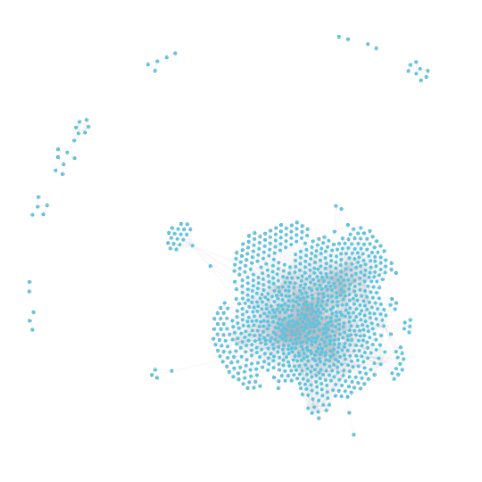

In [84]:
mostrar_grafo("grafo_geral.png")

Grafo Viral

In [28]:
#  Mensagens virais
cluster_virais = df_similaridade[
    (df_similaridade["cluster_mensagem"] != -1) & (df_similaridade["is_viral"])
]

for grupo, sub_df in cluster_virais.groupby("cluster_mensagem"):
    usuarios = sub_df["id_member_anonymous"].dropna().unique()
    for u1, u2 in combinations(usuarios, 2):
        graph.run("""
            MATCH (a:User {id: $u1}), (b:User {id: $u2})
            MERGE (a)-[r:SAME_MSG_VIRAL]->(b)
            ON CREATE SET r.weight = 1
            ON MATCH SET r.weight = r.weight + 1
        """, u1=str(u1), u2=str(u2))

print("🔹 Arestas grafo virais criadas.")

🔹 Arestas grafo virais criadas.


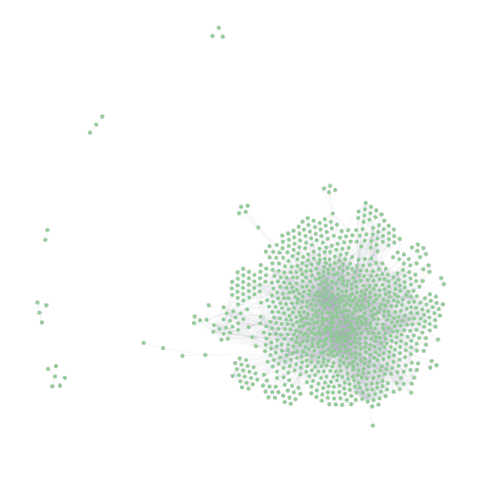

In [85]:
mostrar_grafo("grafo_viral.png")

Grafo desinformação

In [29]:
# Mensagens de desinformação
cluster_misinfo = df_similaridade[
    (df_similaridade["cluster_mensagem"] != -1) & (df_similaridade["is_misinfo"])
]

for grupo, sub_df in cluster_misinfo.groupby("cluster_mensagem"):
    usuarios = sub_df["id_member_anonymous"].dropna().unique()
    for u1, u2 in combinations(usuarios, 2):
        graph.run("""
            MATCH (a:User {id: $u1}), (b:User {id: $u2})
            MERGE (a)-[r:SAME_MSG_MISINFO]->(b)
            ON CREATE SET r.weight = 1
            ON MATCH SET r.weight = r.weight + 1
        """, u1=str(u1), u2=str(u2))

print("🔹 Arestas grafo de desinformação criadas.")

🔹 Arestas grafo de desinformação criadas.


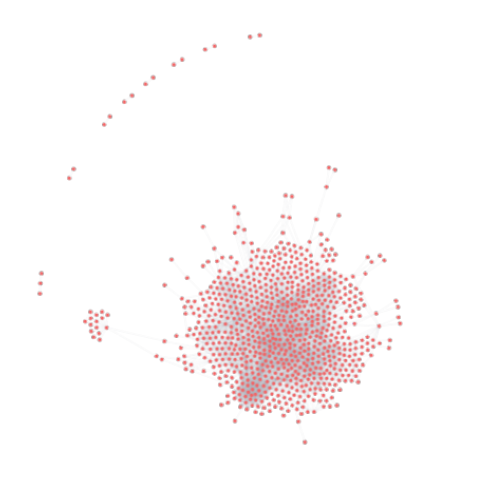

In [87]:
mostrar_grafo("grafo_desinformacao.png")

Os três grafos, a quantidade de nós é a mesma, variando a quantidade de
arestas.

In [30]:
# consulta Cypher para comparar os três grafos
query = """
MATCH (n:User)
WITH count(n) AS total_nos
MATCH ()-[r:SAME_MSG]->()
WITH total_nos, count(r) AS arestas_geral
MATCH ()-[r:SAME_MSG_VIRAL]->()
WITH total_nos, arestas_geral, count(r) AS arestas_viral
MATCH ()-[r:SAME_MSG_MISINFO]->()
RETURN total_nos, arestas_geral, arestas_viral, count(r) AS arestas_misinfo
"""

# executa a query
result = graph.run(query).data()
print("Resumo dos Grafos: ", result)

Resumo dos Grafos:  [{'total_nos': 10677, 'arestas_geral': 46068, 'arestas_viral': 35649, 'arestas_misinfo': 14905}]


#### Verifique se existem grupos isolados e clusters de usuários fortemente conectados. Isso pode ocorrer caso existam usuários engajados que possuem participação ativa em diversos grupos.

Para isso será utilizado um Plugin do Neo4j, chamado "Graph Data Science"

##### Grafo Geral

In [90]:
# Criar projeção em memória
graph.run("""
CALL gds.graph.project(
  'grafoMsg',
  'User',
  {
    SAME_MSG: {
      orientation: 'NATURAL',
      properties: 'weight'
    }
  }
)
""")

nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
"{User: {label: 'User', properties: {}}}","{SAME_MSG: {aggregation: 'DEFAULT', orientation: 'NATURAL', indexInverse: false, properties: {weight: {aggregation: 'DEFAULT', property: 'weight', defaultValue: null}}, type: 'SAME_MSG'}}",grafoMsg,10677,46068,100


In [32]:
# Rodar Weakly Connected Components (WCC)
query_wcc = """
CALL gds.wcc.stream('grafoMsg')
YIELD nodeId, componentId
RETURN gds.util.asNode(nodeId).id AS usuario, componentId
ORDER BY componentId, usuario;
"""
df_wcc = pd.DataFrame(graph.run(query_wcc).data())
print("🔹 Componentes fracos (grupos isolados):")
print(df_wcc)

🔹 Componentes fracos (grupos isolados):
                                usuario  componentId
0      1078cc958f0febe28f4d03207660715f            0
1      0025b8d2ad029135a314997d36d499c9            1
2      0036df952bd1bbdd86f79233aff6b6f3            1
3      0049ead7ba0fe5920ee42c7ac245e073            1
4      004d0bb2f123bd6bf56b11c5b0b9b06b            1
...                                 ...          ...
10672  4dd2785c1e784608314af259d655139d        10672
10673  5993a3b1c2a55c6642a89d42b30e07d1        10673
10674  8203868ffea41c4e31704b7a728f32e3        10674
10675  8357d09a2af605633d75995c507077be        10675
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


In [33]:
# Rodar Strongly Connected Components (SCC)
query_scc = """
CALL gds.scc.stream('grafoMsg')
YIELD nodeId, componentId
RETURN gds.util.asNode(nodeId).id AS usuario, componentId
ORDER BY componentId, usuario;
"""
df_scc = pd.DataFrame(graph.run(query_scc).data())
print("\n🔹 Componentes fortes (clusters conectados):")
print(df_scc)


🔹 Componentes fortes (clusters conectados):
                                usuario  componentId
0      1078cc958f0febe28f4d03207660715f            0
1      0025b8d2ad029135a314997d36d499c9            1
2      0036df952bd1bbdd86f79233aff6b6f3            1
3      0049ead7ba0fe5920ee42c7ac245e073            1
4      00659af5fd4cb4aaf0c9445d398a3c5f            1
...                                 ...          ...
10672  4dd2785c1e784608314af259d655139d        10672
10673  5993a3b1c2a55c6642a89d42b30e07d1        10673
10674  8203868ffea41c4e31704b7a728f32e3        10674
10675  8357d09a2af605633d75995c507077be        10675
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


In [34]:
# Remover projeção do grafo geral
graph.run("CALL gds.graph.drop('grafoMsg', false) YIELD graphName")
print("✅ Projeção 'grafoMsg' removida da memória")

✅ Projeção 'grafoMsg' removida da memória


##### Grafo Viral

In [35]:
# Criar projeção em memória para mensagens virais
graph.run("""
CALL gds.graph.project(
  'grafoMsgViral',
  'User',
  {
    SAME_MSG_VIRAL: {
      orientation: 'NATURAL',
      properties: 'weight'
    }
  }
)
""")

nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
"{User: {label: 'User', properties: {}}}","{SAME_MSG_VIRAL: {aggregation: 'DEFAULT', orientation: 'NATURAL', indexInverse: false, properties: {weight: {aggregation: 'DEFAULT', property: 'weight', defaultValue: null}}, type: 'SAME_MSG_VIRAL'}}",grafoMsgViral,10677,35649,76


In [36]:
# Rodar Weakly Connected Components (WCC) no grafo viral
query_wcc_viral = """
CALL gds.wcc.stream('grafoMsgViral')
YIELD nodeId, componentId
RETURN gds.util.asNode(nodeId).id AS usuario, componentId
ORDER BY componentId, usuario;
"""
df_wcc_viral = pd.DataFrame(graph.run(query_wcc_viral).data())
print("🔹 Componentes fracos (grupos isolados) - VIRAL:")
print(df_wcc_viral)

🔹 Componentes fracos (grupos isolados) - VIRAL:
                                usuario  componentId
0      1078cc958f0febe28f4d03207660715f            0
1      0036df952bd1bbdd86f79233aff6b6f3            1
2      0049ead7ba0fe5920ee42c7ac245e073            1
3      00659af5fd4cb4aaf0c9445d398a3c5f            1
4      0098e627d15af9f086e9ea1d164afabb            1
...                                 ...          ...
10672  4dd2785c1e784608314af259d655139d        10672
10673  5993a3b1c2a55c6642a89d42b30e07d1        10673
10674  8203868ffea41c4e31704b7a728f32e3        10674
10675  8357d09a2af605633d75995c507077be        10675
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


In [37]:
# Rodar Strongly Connected Components (SCC) no grafo viral
query_scc_viral = """
CALL gds.scc.stream('grafoMsgViral')
YIELD nodeId, componentId
RETURN gds.util.asNode(nodeId).id AS usuario, componentId
ORDER BY componentId, usuario;
"""
df_scc_viral = pd.DataFrame(graph.run(query_scc_viral).data())
print("\n🔹 Componentes fortes (clusters conectados) - VIRAL:")
print(df_scc_viral)


🔹 Componentes fortes (clusters conectados) - VIRAL:
                                usuario  componentId
0      1078cc958f0febe28f4d03207660715f            0
1      0036df952bd1bbdd86f79233aff6b6f3            1
2      0049ead7ba0fe5920ee42c7ac245e073            1
3      00659af5fd4cb4aaf0c9445d398a3c5f            1
4      0098e627d15af9f086e9ea1d164afabb            1
...                                 ...          ...
10672  4dd2785c1e784608314af259d655139d        10672
10673  5993a3b1c2a55c6642a89d42b30e07d1        10673
10674  8203868ffea41c4e31704b7a728f32e3        10674
10675  8357d09a2af605633d75995c507077be        10675
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


In [38]:
# Remover projeção do grafo viral
graph.run("CALL gds.graph.drop('grafoMsgViral', false) YIELD graphName")
print("✅ Projeção 'grafoMsgViral' removida da memória")

✅ Projeção 'grafoMsgViral' removida da memória


##### Grafo Desinformação

In [39]:
# Criar projeção em memória para mensagens de desinformação
graph.run("""
CALL gds.graph.project(
  'grafoMsgMisinfo',
  'User',
  {
    SAME_MSG_MISINFO: {
      orientation: 'NATURAL',
      properties: 'weight'
    }
  }
)
""")

nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
"{User: {label: 'User', properties: {}}}","{SAME_MSG_MISINFO: {aggregation: 'DEFAULT', orientation: 'NATURAL', indexInverse: false, properties: {weight: {aggregation: 'DEFAULT', property: 'weight', defaultValue: null}}, type: 'SAME_MSG_MISINFO'}}",grafoMsgMisinfo,10677,14905,58


In [40]:
# Rodar Weakly Connected Components (WCC) no grafo de desinformação
query_wcc_misinfo = """
CALL gds.wcc.stream('grafoMsgMisinfo')
YIELD nodeId, componentId
RETURN gds.util.asNode(nodeId).id AS usuario, componentId
ORDER BY componentId, usuario;
"""
df_wcc_misinfo = pd.DataFrame(graph.run(query_wcc_misinfo).data())
print("🔹 Componentes fracos (grupos isolados) - MISINFO:")
print(df_wcc_misinfo)

🔹 Componentes fracos (grupos isolados) - MISINFO:
                                usuario  componentId
0      1078cc958f0febe28f4d03207660715f            0
1      0025b8d2ad029135a314997d36d499c9            1
2      0049ead7ba0fe5920ee42c7ac245e073            1
3      00fa647e46056862f1b7594c886e15a9            1
4      01567ade2217189810466c5d43ad14ac            1
...                                 ...          ...
10672  4dd2785c1e784608314af259d655139d        10672
10673  5993a3b1c2a55c6642a89d42b30e07d1        10673
10674  8203868ffea41c4e31704b7a728f32e3        10674
10675  8357d09a2af605633d75995c507077be        10675
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


In [41]:
# Rodar Strongly Connected Components (SCC) no grafo de desinformação
query_scc_misinfo = """
CALL gds.scc.stream('grafoMsgMisinfo')
YIELD nodeId, componentId
RETURN gds.util.asNode(nodeId).id AS usuario, componentId
ORDER BY componentId, usuario;
"""
df_scc_misinfo = pd.DataFrame(graph.run(query_scc_misinfo).data())
print("\n🔹 Componentes fortes (clusters conectados) - MISINFO:")
print(df_scc_misinfo)


🔹 Componentes fortes (clusters conectados) - MISINFO:
                                usuario  componentId
0      1078cc958f0febe28f4d03207660715f            0
1      92a2d8fd7144074f659d1d29dc3751da            1
2      d60aa38f62b4977426b70944af4aff72            2
3      3b685d44ff197b98d7c9e99b8f6b5281            3
4      a7e85072244cae15446c9d517dc01a1a            4
...                                 ...          ...
10672  4dd2785c1e784608314af259d655139d        10672
10673  5993a3b1c2a55c6642a89d42b30e07d1        10673
10674  8203868ffea41c4e31704b7a728f32e3        10674
10675  8357d09a2af605633d75995c507077be        10675
10676  eb1da8f741b919931b2cd09f60c7c1dc        10676

[10677 rows x 2 columns]


In [42]:
# Remover projeção do grafo de desinformação
graph.run("CALL gds.graph.drop('grafoMsgMisinfo', false) YIELD graphName")
print("✅ Projeção 'grafoMsgMisinfo' removida da memória")

✅ Projeção 'grafoMsgMisinfo' removida da memória


#### **Grau de centralidade geral**: quantidade de arestas de mensagens gerais saindo do nó. Ou seja, para um dado usuário, mensura o número de usuários que receberam ao menos uma mensagem dele. Quanto maior, com mais usuários esse usuário teve contato;

In [43]:
query = """
MATCH (u:User)-[r:SAME_MSG]->(v:User)
RETURN u.id AS usuario, count(DISTINCT v) AS grau_centralidade_geral
ORDER BY grau_centralidade_geral DESC
"""
df_grau_geral = pd.DataFrame(graph.run(query).data())
print(df_grau_geral)

                               usuario  grau_centralidade_geral
0     1ac091b8ed5c4e42383f1b4ff4cc9b2d                      377
1     e7998863ac2a40086657fab4a6b463c9                      370
2     f4561a21fb26cfbebf48dcd5c557f82f                      355
3     e5e3e38d433016adf62ea34432853a3c                      352
4     f233cf8b1d4ede06f32199a7e0081bf5                      337
...                                ...                      ...
2399  4ac0d08ff9bcbfc57f1ee1548dd704a1                        1
2400  f00666135aabbd3d75b87950ee3336cf                        1
2401  86330134e189a53e3fc6fb4030035cfe                        1
2402  26adc04fa35171fc1b3cb1d8b8a43ddb                        1
2403  e859c4f7a1daf7ea82a3c6dd7f4e216d                        1

[2404 rows x 2 columns]


#### **Força geral**: somatório dos pesos de todas as arestas de mensagens gerais saindo do nó. É correlacionado com o grau de centralidade geral, porém a quantidade de mensagens enviadas também é levada em conta para calcular essa métrica. Um valor alto indica que o usuário enviou muitas mensagens que atingiram muitos usuários;

In [101]:
query = """
MATCH (u:User)-[r:SAME_MSG]->(v:User)
RETURN u.id AS usuario, sum(r.weight) AS forca_geral
ORDER BY forca_geral DESC
"""
df_forca_geral = pd.DataFrame(graph.run(query).data())
print(df_forca_geral)

                               usuario  forca_geral
0     1ac091b8ed5c4e42383f1b4ff4cc9b2d         1089
1     e7998863ac2a40086657fab4a6b463c9          636
2     e5e3e38d433016adf62ea34432853a3c          628
3     fa582c9e95da255e44f4c198d0daf3df          522
4     f4561a21fb26cfbebf48dcd5c557f82f          477
...                                ...          ...
2399  4ac0d08ff9bcbfc57f1ee1548dd704a1            1
2400  f00666135aabbd3d75b87950ee3336cf            1
2401  86330134e189a53e3fc6fb4030035cfe            1
2402  26adc04fa35171fc1b3cb1d8b8a43ddb            1
2403  e859c4f7a1daf7ea82a3c6dd7f4e216d            1

[2404 rows x 2 columns]


#### **Grau de centralidade viral:**: análogo ao grau de centralidade geral, mas relativo somente às mensagens virais, sendo a quantidade de arestas de mensagens virais saindo do nó. Quanto maior, mais usuários receberam mensagens virais desse usuário;

In [45]:
query = """
MATCH (u:User)-[r:SAME_MSG_VIRAL]->(v:User)
RETURN u.id AS usuario, count(DISTINCT v) AS grau_centralidade_viral
ORDER BY grau_centralidade_viral DESC
"""
df_grau_viral = pd.DataFrame(graph.run(query).data())
print(df_grau_viral)

                               usuario  grau_centralidade_viral
0     f233cf8b1d4ede06f32199a7e0081bf5                      315
1     f4561a21fb26cfbebf48dcd5c557f82f                      288
2     e5e3e38d433016adf62ea34432853a3c                      272
3     e7998863ac2a40086657fab4a6b463c9                      269
4     55042681398deb24b5294a9f5cba240c                      225
...                                ...                      ...
1345  295966662a85f83239b7f370da5c8a67                        1
1346  1665e22b0f564cd46d343f7677014821                        1
1347  d7e0bde0bec8231e9600f3b06a352341                        1
1348  e71e291e37fab38857c03b62504d7391                        1
1349  671eaecfe127716cf7a46e4485218b96                        1

[1350 rows x 2 columns]


#### **Força viral:** sanálogo à força geral, é somatório dos pesos de todas as arestas de mensagens virais saindo do nó. Um valor alto indica que o usuário enviou muitas mensagens virais que atingiram muitos usuários;

In [102]:
query = """
MATCH (u:User)-[r:SAME_MSG_VIRAL]->(v:User)
RETURN u.id AS usuario, sum(r.weight) AS forca_viral
ORDER BY forca_viral DESC
"""
df_forca_viral = pd.DataFrame(graph.run(query).data())
print(df_forca_viral)

                               usuario  forca_viral
0     f233cf8b1d4ede06f32199a7e0081bf5          370
1     f4561a21fb26cfbebf48dcd5c557f82f          342
2     e7998863ac2a40086657fab4a6b463c9          323
3     e5e3e38d433016adf62ea34432853a3c          310
4     55042681398deb24b5294a9f5cba240c          251
...                                ...          ...
1345  295966662a85f83239b7f370da5c8a67            1
1346  1665e22b0f564cd46d343f7677014821            1
1347  d7e0bde0bec8231e9600f3b06a352341            1
1348  e71e291e37fab38857c03b62504d7391            1
1349  671eaecfe127716cf7a46e4485218b96            1

[1350 rows x 2 columns]


#### **Grau de centralidade de desinformação:** análogo ao grau de centralidade geral, mas relativo somente às mensagens de desinformação, sendo a quantidade de arestas de desinformação saindo do nó. Ou seja, a quantidade de usuários com quem esse usuário compartilhou desinformação. Quanto maior, mais usuários receberam desinformação desse usuário;

In [47]:
query = """
MATCH (u:User)-[r:SAME_MSG_MISINFO]->(v:User)
RETURN u.id AS usuario, count(DISTINCT v) AS grau_centralidade_misinfo
ORDER BY grau_centralidade_misinfo DESC;
"""
df_grau_misinfo = pd.DataFrame(graph.run(query).data())
print(df_grau_misinfo)

                              usuario  grau_centralidade_misinfo
0    e7998863ac2a40086657fab4a6b463c9                        159
1    f4561a21fb26cfbebf48dcd5c557f82f                        155
2    f233cf8b1d4ede06f32199a7e0081bf5                        145
3    1ac091b8ed5c4e42383f1b4ff4cc9b2d                        135
4    56b8359fd127312651b80b8ed8030085                        117
..                                ...                        ...
953  cd1e2ee16e66e7bf1b289814aa927929                          1
954  efa4c5e20c517c89ab59f379a2474209                          1
955  2917939e9307792ac3427d730dbf2aa4                          1
956  5c441f3e0625f7d4a10a94c4bc002168                          1
957  1abf58a2e1b010fa93fdf3d3f5939ed1                          1

[958 rows x 2 columns]


#### **Força de desinformação:** análogo à força geral, é o somatório dos pesos de todas as arestas de desinformação saindo do nó. Um valor alto indica que o usuário enviou muita desinformação e que atingiu muitos usuários;

In [103]:
query = """
MATCH (u:User)-[r:SAME_MSG_MISINFO]->(v:User)
RETURN u.id AS usuario, sum(r.weight) AS forca_misinfo
ORDER BY forca_misinfo DESC
"""
df_forca_misinfo = pd.DataFrame(graph.run(query).data())
print(df_forca_misinfo)

                              usuario  forca_misinfo
0    e7998863ac2a40086657fab4a6b463c9            193
1    1ac091b8ed5c4e42383f1b4ff4cc9b2d            188
2    f4561a21fb26cfbebf48dcd5c557f82f            174
3    f233cf8b1d4ede06f32199a7e0081bf5            162
4    e5e3e38d433016adf62ea34432853a3c            141
..                                ...            ...
953  cd1e2ee16e66e7bf1b289814aa927929              1
954  efa4c5e20c517c89ab59f379a2474209              1
955  2917939e9307792ac3427d730dbf2aa4              1
956  5c441f3e0625f7d4a10a94c4bc002168              1
957  1abf58a2e1b010fa93fdf3d3f5939ed1              1

[958 rows x 2 columns]


#### Verifique se os atributos de rede seguem uma distribuição de cauda longa, possuindo valores baixos nesses atributos e alguns raros usuários com valores muito altos, indicando um comportamento anormal desses usuários que merece investigação.

In [49]:
import matplotlib.pyplot as plt

def plot_distribution(df, coluna, titulo, bins=50, log_y=True):
    """
    Plota a distribuição de uma métrica de rede (grau ou força).

    Parâmetros:
    - df: DataFrame com os resultados
    - coluna: nome da coluna numérica a ser analisada
    - titulo: título do gráfico
    - bins: número de bins do histograma
    - log_y: se True, coloca o eixo Y em escala logarítmica
    """
    plt.figure(figsize=(8,5))
    plt.hist(df[coluna], bins=bins, edgecolor='black')
    plt.title(titulo)
    plt.xlabel(coluna)
    plt.ylabel("Frequência de usuários")
    if log_y:
        plt.yscale("log")  # ajuda a ver a cauda longa
    plt.show()

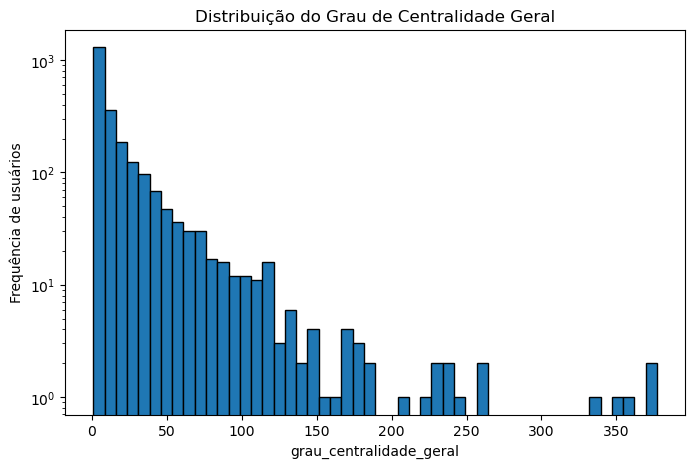

In [50]:
plot_distribution(df_grau_geral, "grau_centralidade_geral", "Distribuição do Grau de Centralidade Geral")

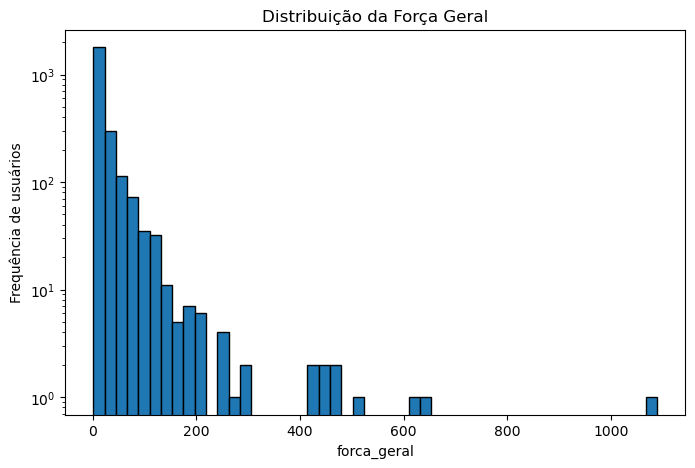

In [51]:
plot_distribution(df_forca_geral, "forca_geral", "Distribuição da Força Geral")

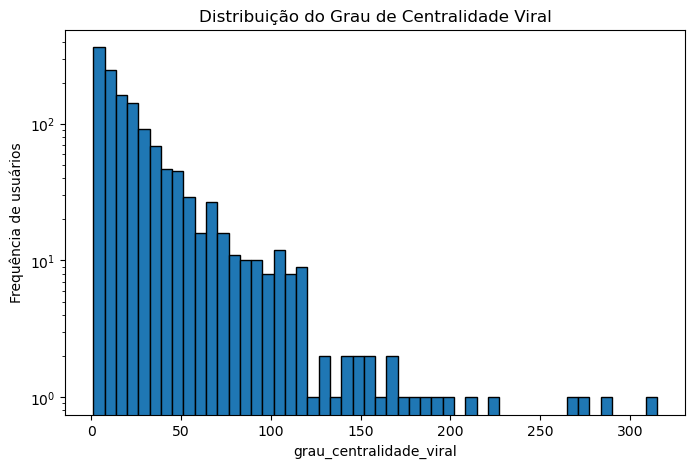

In [52]:
plot_distribution(df_grau_viral, "grau_centralidade_viral", "Distribuição do Grau de Centralidade Viral")


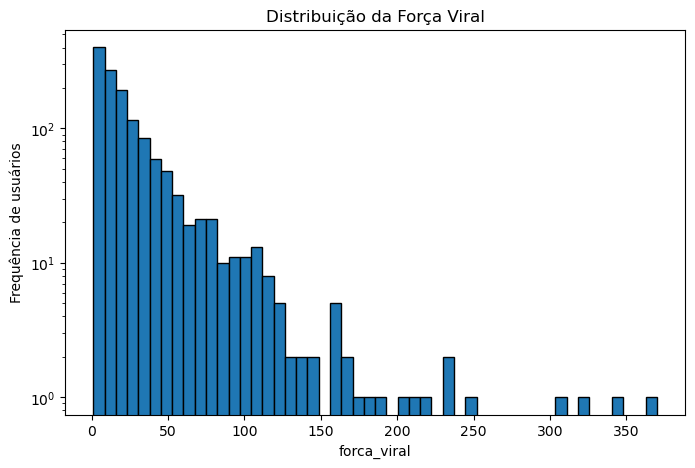

In [53]:
plot_distribution(df_forca_viral, "forca_viral", "Distribuição da Força Viral")


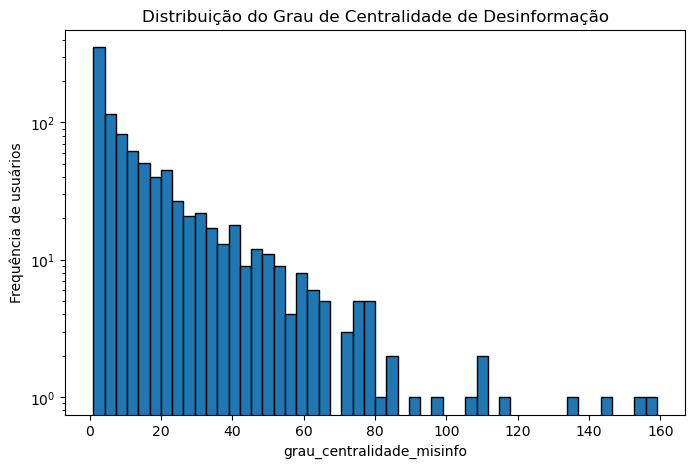

In [54]:
plot_distribution(df_grau_misinfo, "grau_centralidade_misinfo", "Distribuição do Grau de Centralidade de Desinformação")

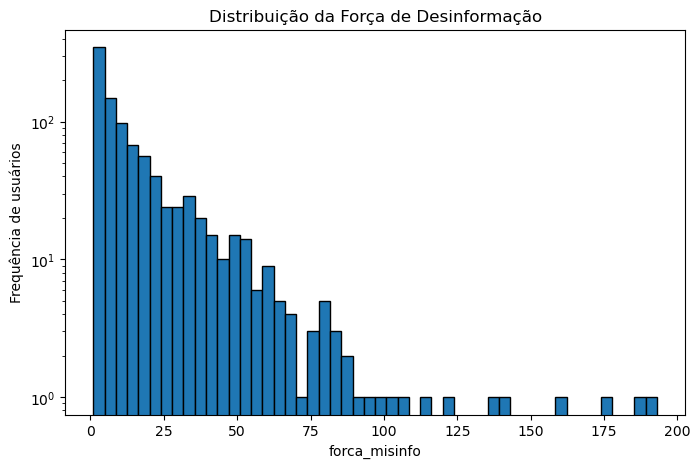

In [55]:
plot_distribution(df_forca_misinfo, "forca_misinfo", "Distribuição da Força de Desinformação")

#### Identifique os 5 usuários mais ativos.

In [93]:
# 5 usuários mais ativos (grafo geral, SAME_MSG)
query = """
MATCH (u:User)-[r:SAME_MSG]->(v:User)
RETURN u.id AS usuario, sum(r.weight) AS forca_geral
ORDER BY forca_geral DESC
LIMIT 5
"""
df_top_ativos = pd.DataFrame(graph.run(query).data())
print("🔹 Usuários mais ativos (grafo geral):")
print(df_top_ativos)

🔹 Usuários mais ativos (grafo geral):
                            usuario  forca_geral
0  1ac091b8ed5c4e42383f1b4ff4cc9b2d         1089
1  e7998863ac2a40086657fab4a6b463c9          636
2  e5e3e38d433016adf62ea34432853a3c          628
3  fa582c9e95da255e44f4c198d0daf3df          522
4  f4561a21fb26cfbebf48dcd5c557f82f          477


#### Identifique os 5 usuários que mais espalham desinformação.

In [95]:
query = """
MATCH (u:User)-[r:SAME_MSG_MISINFO]->(v:User)
RETURN u.id AS usuario, sum(r.weight) AS forca_misinfo
ORDER BY forca_misinfo DESC
LIMIT 5
"""
df_top_misinfo = pd.DataFrame(graph.run(query).data())
print("🔹 Usuários que mais espalham desinformação:")
print(df_top_misinfo)

🔹 Usuários que mais espalham desinformação:
                            usuario  forca_misinfo
0  e7998863ac2a40086657fab4a6b463c9            193
1  1ac091b8ed5c4e42383f1b4ff4cc9b2d            188
2  f4561a21fb26cfbebf48dcd5c557f82f            174
3  f233cf8b1d4ede06f32199a7e0081bf5            162
4  e5e3e38d433016adf62ea34432853a3c            141


#### Identifique os 5 usuários mais influentes.

In [96]:
query = """
MATCH (u:User)-[r:SAME_MSG]->(v:User)
RETURN u.id AS usuario, sum(r.weight) AS forca_geral
ORDER BY forca_geral DESC
LIMIT 5
"""
df_top_influentes = pd.DataFrame(graph.run(query).data())
print("🔹 Usuários mais influentes (força geral):")
print(df_top_influentes)

🔹 Usuários mais influentes (força geral):
                            usuario  forca_geral
0  1ac091b8ed5c4e42383f1b4ff4cc9b2d         1089
1  e7998863ac2a40086657fab4a6b463c9          636
2  e5e3e38d433016adf62ea34432853a3c          628
3  fa582c9e95da255e44f4c198d0daf3df          522
4  f4561a21fb26cfbebf48dcd5c557f82f          477


In [91]:
# === Influência por PageRank (centralidade estrutural no grafo) ===
query_pagerank = """
CALL gds.pageRank.stream('grafoMsg')
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).id AS user, score
ORDER BY score DESC
LIMIT 5
"""
df_top_pagerank = pd.DataFrame(graph.run(query_pagerank).data())
print("\n🔹 Usuários mais influentes (PageRank):")
print(df_top_pagerank)


🔹 Usuários mais influentes (PageRank):
                               user      score
0  1ac091b8ed5c4e42383f1b4ff4cc9b2d  11.326875
1  e7998863ac2a40086657fab4a6b463c9  10.983623
2  c052c859b42c5a1923c22f5a201de746   9.784830
3  56b8359fd127312651b80b8ed8030085   9.469503
4  beb77036ff26e78865da19310ac95169   8.045764


#### Identifique os 5 usuários mais conectados.

In [100]:
query = """
MATCH (u:User)-[r:SAME_MSG]->(v:User)
RETURN u.id AS usuario, count(DISTINCT v) AS grau_geral
ORDER BY grau_geral DESC
LIMIT 5
"""
df_top_conectados = pd.DataFrame(graph.run(query).data())
print("🔹 Usuários mais conectados (grau geral):")
print(df_top_conectados)


🔹 Usuários mais conectados (grau geral):
                            usuario  grau_geral
0  1ac091b8ed5c4e42383f1b4ff4cc9b2d         377
1  e7998863ac2a40086657fab4a6b463c9         370
2  f4561a21fb26cfbebf48dcd5c557f82f         355
3  e5e3e38d433016adf62ea34432853a3c         352
4  f233cf8b1d4ede06f32199a7e0081bf5         337
